<hr style='margin-bottom:30px;'>  

# Noble Prize Winners Visualization Project 

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

<img src='Nobel_Prize.png' style='float:right; width:300px; margin:30px 30px 30px 30px;'>

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)m

## Step 0: Imports and Reading Data

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 


plt.style.use('ggplot')
pd.set_option('display.max_columns',300)
pd.set_option('display.float_format',"{:.2f}".format)
sns.set_style('whitegrid')
sns.set_context('paper')
# Start coding here!

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('data/nobel.csv',sep=',',parse_dates=['birth_date','death_date'],date_format="%Y-%m-%d",header=0)

In [4]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [5]:
df.shape

(1000, 18)

In [6]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [7]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 18 entries, year to death_country
dtypes: datetime64[ns](1), int64(2), object(15)
memory usage: 140.8+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  1000 non-null   int64         
 1   category              1000 non-null   object        
 2   prize                 1000 non-null   object        
 3   motivation            912 non-null    object        
 4   prize_share           1000 non-null   object        
 5   laureate_id           1000 non-null   int64         
 6   laureate_type         1000 non-null   object        
 7   full_name             1000 non-null   object        
 8   birth_date            968 non-null    object        
 9   birth_city            964 non-null    object        
 10  birth_country         969 non-null    object        
 11  sex                   970 non-null    object        
 12  organization_name     736 non-null    object        
 13  organization_city  

In [9]:
df.describe()

,year,laureate_id,death_date
count,1000.00,1000.00,596
mean,1973.72,509.10,1975-02-14 13:48:43.489932896
min,1901.00,1.00,1903-11-01 00:00:00
25%,1949.75,250.75,1954-02-15 12:00:00
50%,1979.00,500.50,1980-03-09 12:00:00
75%,2003.00,764.25,2000-01-05 00:00:00
max,2023.00,1034.00,2023-10-13 00:00:00
std,34.52,298.13,NaN


In [10]:
df.dtypes

year                             int64
category                        object
prize                           object
motivation                      object
prize_share                     object
laureate_id                      int64
laureate_type                   object
full_name                       object
birth_date                      object
birth_city                      object
birth_country                   object
sex                             object
organization_name               object
organization_city               object
organization_country            object
death_date              datetime64[ns]
death_city                      object
death_country                   object
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 1: Data Preperation

- Changing Data Types
- Checking for Null Values
- Checking for Duplicates

In [11]:
df['birth_date'] = df['birth_date'].str.strip()

In [12]:
contains_00 = df[df['birth_date'].apply(lambda x: '-00-' in str(x) or '-00' in str(x))].copy()

In [13]:
### TODO: Fix birth_date with 00-00 and replace with 01-01 

In [14]:
contains_00

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
932,2018,Peace,The Nobel Peace Prize 2018,"""for their efforts to end the use of sexual vi...",1/2,967,Individual,Nadia Murad,1993-00-00,Kojo,Iraq,Female,NaN,NaN,NaN,NaT,NaN,NaN
934,2018,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for integrating technological innovations int...",1/2,969,Individual,Paul M. Romer,1955-00-00,"Denver, CO",United States of America,Male,NYU Stern School of Business,"New York, NY",United States of America,NaT,NaN,NaN
951,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,"""for the discovery of Hepatitis C virus""",1/3,986,Individual,Michael Houghton,1949-00-00,NaN,United Kingdom,Male,University of Alberta,Edmonton,Canada,NaT,NaN,NaN
963,2021,Medicine,The Nobel Prize in Physiology or Medicine 2021,"""for their discoveries of receptors for temper...",1/2,998,Individual,Ardem Patapoutian,1967-00-00,Beirut,Lebanon,Male,Scripps Research,"La Jolla, CA",United States of America,NaT,NaN,NaN
969,2021,Literature,The Nobel Prize in Literature 2021,"""for his uncompromising and compassionate pene...",1/1,1004,Individual,Abdulrazak Gurnah,1948-00-00,NaN,NaN,Male,NaN,NaN,NaN,NaT,NaN,NaN
971,2021,Peace,The Nobel Peace Prize 2021,"""for their efforts to safeguard freedom of exp...",1/2,1006,Individual,Dmitry Muratov,1961-00-00,Kubyshev (now Samara),USSR (now Russia),Male,NaN,NaN,NaN,NaT,NaN,NaN
972,2021,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirical contributions to labour eco...",1/2,1007,Individual,David Card,1956-00-00,Guelph,Canada,Male,University of California,"Berkeley, CA",United States of America,NaT,NaN,NaN
981,2022,Chemistry,The Nobel Prize in Chemistry 2022,"""for the development of click chemistry and bi...",1/3,1016,Individual,Morten Meldal,1954-00-00,Copenhagen,Denmark,Male,University of Copenhagen,Copenhagen,Denmark,NaT,NaN,NaN
994,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1029,Individual,Moungi Bawendi,1961-00-00,Paris,France,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,NaT,NaN,NaN
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaT,NaN,NaN


In [15]:
contains_00['birth_date'] = contains_00['birth_date'].apply(lambda x: x.replace("-00-00", "-01-01"))

In [16]:
contains_00

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
932,2018,Peace,The Nobel Peace Prize 2018,"""for their efforts to end the use of sexual vi...",1/2,967,Individual,Nadia Murad,1993-01-01,Kojo,Iraq,Female,NaN,NaN,NaN,NaT,NaN,NaN
934,2018,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for integrating technological innovations int...",1/2,969,Individual,Paul M. Romer,1955-01-01,"Denver, CO",United States of America,Male,NYU Stern School of Business,"New York, NY",United States of America,NaT,NaN,NaN
951,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,"""for the discovery of Hepatitis C virus""",1/3,986,Individual,Michael Houghton,1949-01-01,NaN,United Kingdom,Male,University of Alberta,Edmonton,Canada,NaT,NaN,NaN
963,2021,Medicine,The Nobel Prize in Physiology or Medicine 2021,"""for their discoveries of receptors for temper...",1/2,998,Individual,Ardem Patapoutian,1967-01-01,Beirut,Lebanon,Male,Scripps Research,"La Jolla, CA",United States of America,NaT,NaN,NaN
969,2021,Literature,The Nobel Prize in Literature 2021,"""for his uncompromising and compassionate pene...",1/1,1004,Individual,Abdulrazak Gurnah,1948-01-01,NaN,NaN,Male,NaN,NaN,NaN,NaT,NaN,NaN
971,2021,Peace,The Nobel Peace Prize 2021,"""for their efforts to safeguard freedom of exp...",1/2,1006,Individual,Dmitry Muratov,1961-01-01,Kubyshev (now Samara),USSR (now Russia),Male,NaN,NaN,NaN,NaT,NaN,NaN
972,2021,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirical contributions to labour eco...",1/2,1007,Individual,David Card,1956-01-01,Guelph,Canada,Male,University of California,"Berkeley, CA",United States of America,NaT,NaN,NaN
981,2022,Chemistry,The Nobel Prize in Chemistry 2022,"""for the development of click chemistry and bi...",1/3,1016,Individual,Morten Meldal,1954-01-01,Copenhagen,Denmark,Male,University of Copenhagen,Copenhagen,Denmark,NaT,NaN,NaN
994,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1029,Individual,Moungi Bawendi,1961-01-01,Paris,France,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,NaT,NaN,NaN
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-01-01,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaT,NaN,NaN


In [17]:
contains_00.index

Index([932, 934, 951, 963, 969, 971, 972, 981, 994, 995, 996, 999], dtype='int64')

In [18]:
df.iloc[contains_00.index]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
932,2018,Peace,The Nobel Peace Prize 2018,"""for their efforts to end the use of sexual vi...",1/2,967,Individual,Nadia Murad,1993-00-00,Kojo,Iraq,Female,NaN,NaN,NaN,NaT,NaN,NaN
934,2018,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for integrating technological innovations int...",1/2,969,Individual,Paul M. Romer,1955-00-00,"Denver, CO",United States of America,Male,NYU Stern School of Business,"New York, NY",United States of America,NaT,NaN,NaN
951,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,"""for the discovery of Hepatitis C virus""",1/3,986,Individual,Michael Houghton,1949-00-00,NaN,United Kingdom,Male,University of Alberta,Edmonton,Canada,NaT,NaN,NaN
963,2021,Medicine,The Nobel Prize in Physiology or Medicine 2021,"""for their discoveries of receptors for temper...",1/2,998,Individual,Ardem Patapoutian,1967-00-00,Beirut,Lebanon,Male,Scripps Research,"La Jolla, CA",United States of America,NaT,NaN,NaN
969,2021,Literature,The Nobel Prize in Literature 2021,"""for his uncompromising and compassionate pene...",1/1,1004,Individual,Abdulrazak Gurnah,1948-00-00,NaN,NaN,Male,NaN,NaN,NaN,NaT,NaN,NaN
971,2021,Peace,The Nobel Peace Prize 2021,"""for their efforts to safeguard freedom of exp...",1/2,1006,Individual,Dmitry Muratov,1961-00-00,Kubyshev (now Samara),USSR (now Russia),Male,NaN,NaN,NaN,NaT,NaN,NaN
972,2021,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirical contributions to labour eco...",1/2,1007,Individual,David Card,1956-00-00,Guelph,Canada,Male,University of California,"Berkeley, CA",United States of America,NaT,NaN,NaN
981,2022,Chemistry,The Nobel Prize in Chemistry 2022,"""for the development of click chemistry and bi...",1/3,1016,Individual,Morten Meldal,1954-00-00,Copenhagen,Denmark,Male,University of Copenhagen,Copenhagen,Denmark,NaT,NaN,NaN
994,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1029,Individual,Moungi Bawendi,1961-00-00,Paris,France,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,NaT,NaN,NaN
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaT,NaN,NaN


In [19]:
df.iloc[contains_00.index] = contains_00

In [20]:
df.iloc[contains_00.index]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
932,2018,Peace,The Nobel Peace Prize 2018,"""for their efforts to end the use of sexual vi...",1/2,967,Individual,Nadia Murad,1993-01-01,Kojo,Iraq,Female,NaN,NaN,NaN,NaT,NaN,NaN
934,2018,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for integrating technological innovations int...",1/2,969,Individual,Paul M. Romer,1955-01-01,"Denver, CO",United States of America,Male,NYU Stern School of Business,"New York, NY",United States of America,NaT,NaN,NaN
951,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,"""for the discovery of Hepatitis C virus""",1/3,986,Individual,Michael Houghton,1949-01-01,NaN,United Kingdom,Male,University of Alberta,Edmonton,Canada,NaT,NaN,NaN
963,2021,Medicine,The Nobel Prize in Physiology or Medicine 2021,"""for their discoveries of receptors for temper...",1/2,998,Individual,Ardem Patapoutian,1967-01-01,Beirut,Lebanon,Male,Scripps Research,"La Jolla, CA",United States of America,NaT,NaN,NaN
969,2021,Literature,The Nobel Prize in Literature 2021,"""for his uncompromising and compassionate pene...",1/1,1004,Individual,Abdulrazak Gurnah,1948-01-01,NaN,NaN,Male,NaN,NaN,NaN,NaT,NaN,NaN
971,2021,Peace,The Nobel Peace Prize 2021,"""for their efforts to safeguard freedom of exp...",1/2,1006,Individual,Dmitry Muratov,1961-01-01,Kubyshev (now Samara),USSR (now Russia),Male,NaN,NaN,NaN,NaT,NaN,NaN
972,2021,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirical contributions to labour eco...",1/2,1007,Individual,David Card,1956-01-01,Guelph,Canada,Male,University of California,"Berkeley, CA",United States of America,NaT,NaN,NaN
981,2022,Chemistry,The Nobel Prize in Chemistry 2022,"""for the development of click chemistry and bi...",1/3,1016,Individual,Morten Meldal,1954-01-01,Copenhagen,Denmark,Male,University of Copenhagen,Copenhagen,Denmark,NaT,NaN,NaN
994,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1029,Individual,Moungi Bawendi,1961-01-01,Paris,France,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,NaT,NaN,NaN
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-01-01,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaT,NaN,NaN


In [21]:
df['birth_date'] = pd.to_datetime(df['birth_date'])

In [22]:
df.dtypes

year                             int64
category                        object
prize                           object
motivation                      object
prize_share                     object
laureate_id                      int64
laureate_type                   object
full_name                       object
birth_date              datetime64[ns]
birth_city                      object
birth_country                   object
sex                             object
organization_name               object
organization_city               object
organization_country            object
death_date              datetime64[ns]
death_city                      object
death_country                   object
dtype: object

In [23]:
df['year'] = pd.to_datetime(df['year'],format="%Y")

In [24]:
df.dtypes

year                    datetime64[ns]
category                        object
prize                           object
motivation                      object
prize_share                     object
laureate_id                      int64
laureate_type                   object
full_name                       object
birth_date              datetime64[ns]
birth_city                      object
birth_country                   object
sex                             object
organization_name               object
organization_city               object
organization_country            object
death_date              datetime64[ns]
death_city                      object
death_country                   object
dtype: object

In [25]:
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

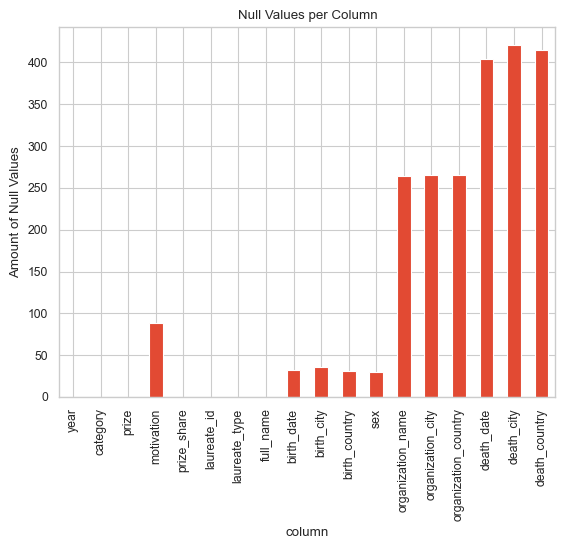

In [26]:
ax = df.isna().sum().plot(kind='bar')
ax.set_xlabel("column")
ax.set_ylabel("Amount of Null Values")
ax.set_title("Null Values per Column")
plt.show()

In [27]:
df['sex'].value_counts()

sex
Male      905
Female     65
Name: count, dtype: int64

In [28]:
df['laureate_type'].value_counts()

laureate_type
Individual      966
Organization     34
Name: count, dtype: int64

In [29]:
df.query('laureate_type == "Organization"')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
24,1904-01-01,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
60,1910-01-01,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
89,1917-01-01,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
200,1938-01-01,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
215,1944-01-01,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
237,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
238,1947-01-01,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
283,1954-01-01,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
348,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
349,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [30]:
df.duplicated().sum()

0

In [31]:
df.dtypes.loc[df.dtypes == 'int64']

laureate_id    int64
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 2: Feature Understanding 

In [54]:
df.head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901-01-01,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902-01-01,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902-01-01,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902-01-01,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


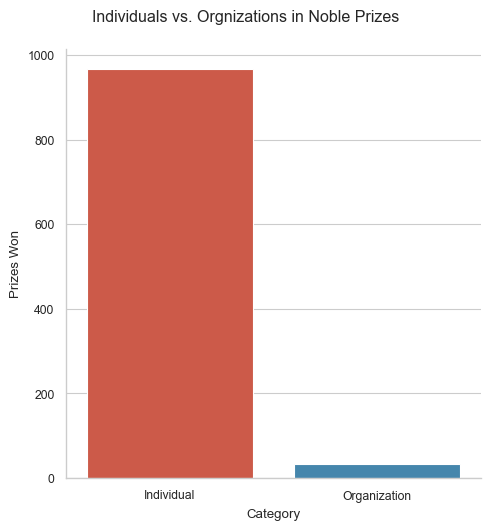

In [59]:
ax=sns.catplot(x='laureate_type',data=df,kind='count')
ax.set(xlabel='Category',
        ylabel='Prizes Won')
ax.fig.suptitle('Individuals vs. Orgnizations in Noble Prizes',y=1.05)

plt.show()

### What is the most commonly awarded gender and birth country?

In [75]:
top_countries = df['birth_country'].value_counts().head(10)
top_countries

birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Japan                        28
Canada                       21
Switzerland                  19
Netherlands                  19
Italy                        18
Name: count, dtype: int64

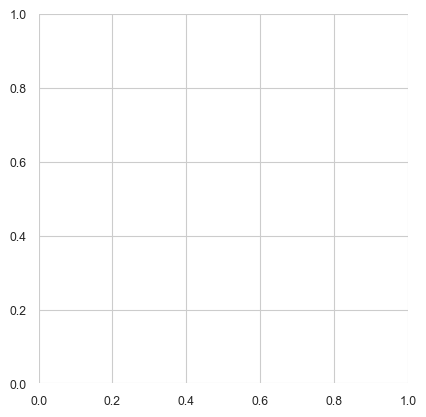

In [107]:
colors = [patch.get_facecolor() for patch in top_countries.plot(kind='pie').patches]
plt.cla()

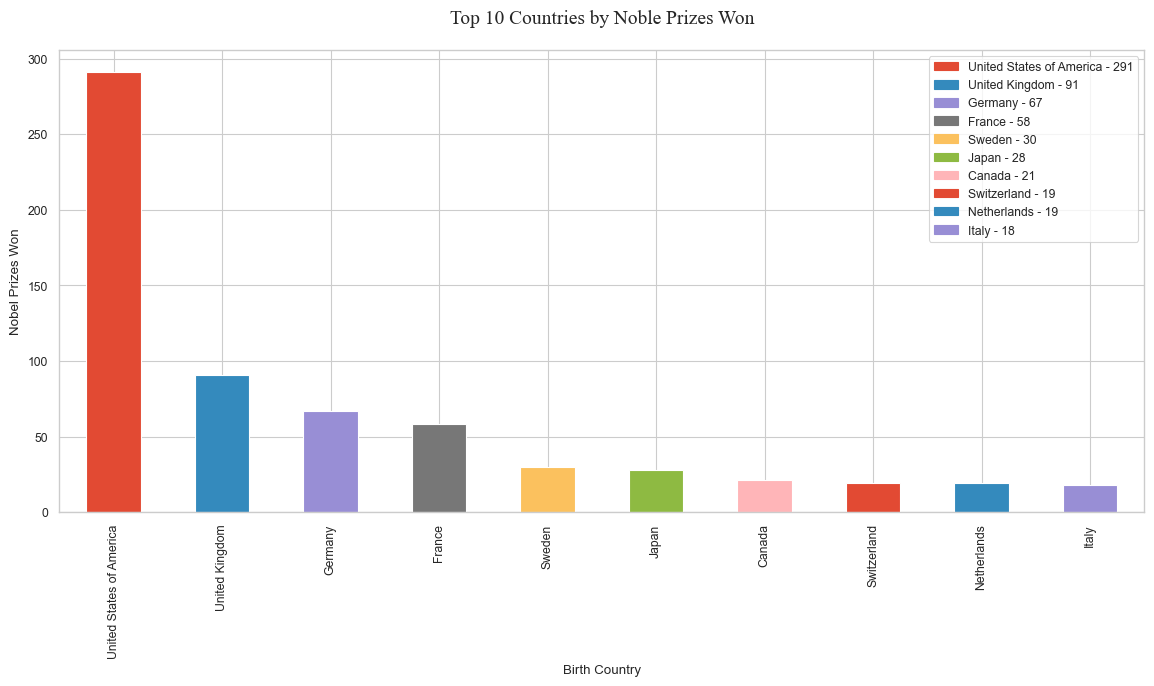

In [114]:
ax = top_countries.plot(kind='bar', figsize=(14,6),color=colors)
ax.set_xlabel("Birth Country")
ax.set_ylabel("Nobel Prizes Won")
ax.set_title("Top 10 Countries by Noble Prizes Won",y=1.04, fontname='Times New Roman',fontsize=14)

handles = [plt.Rectangle((1,1),1,1, color=color) for color in colors]
ax.legend(handles=handles,labels=[f"{x} - {top_countries[x]}" for x in top_countries.index])
plt.show()

In [116]:
top_country = top_countries.index[0]
top_country

'United States of America'

In [119]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [121]:
top_genders = df['sex'].value_counts()
top_genders

sex
Male      905
Female     65
Name: count, dtype: int64

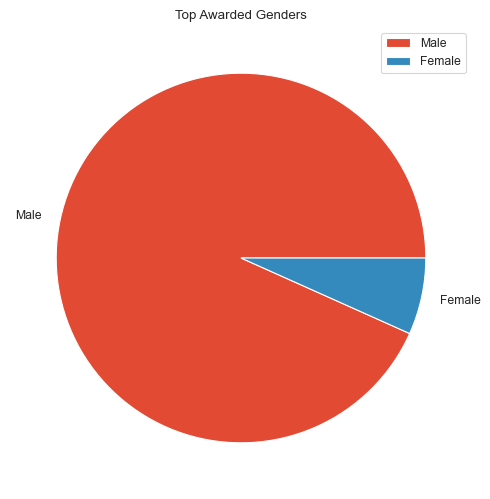

In [132]:
ax = top_genders.plot(kind='pie',figsize=(14,6),title="Top Awarded Genders")
ax.set_ylabel("")
ax.legend()
plt.show()

In [133]:
top_gender = top_genders.index[0]
top_gender

'Male'

### Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [134]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [140]:
df['decade'] = (df['year'].dt.year // 10) * 10
df['decade'].unique()

array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000,
       2010, 2020])

In [144]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'decade'],
      dtype='object')

In [148]:
us_noble_prize_winners = df.query('birth_country == "United States of America"')
us_noble_prize_winners

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
35,1906-01-01,Peace,The Nobel Peace Prize 1906,NaN,1/1,470,Individual,Theodore Roosevelt,1858-10-27,"New York, NY",United States of America,Male,NaN,NaN,NaN,1919-01-06,"Oyster Bay, NY",United States of America,1900
72,1912-01-01,Peace,The Nobel Peace Prize 1912,NaN,1/1,480,Individual,Elihu Root,1845-02-15,"Clinton, NY",United States of America,Male,NaN,NaN,NaN,1937-02-07,"New York, NY",United States of America,1910
79,1914-01-01,Chemistry,The Nobel Prize in Chemistry 1914,"""in recognition of his accurate determinations...",1/1,175,Individual,Theodore William Richards,1868-01-31,"Germantown, PA",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,1928-04-02,"Cambridge, MA",United States of America,1910
95,1919-01-01,Peace,The Nobel Peace Prize 1919,NaN,1/1,483,Individual,Thomas Woodrow Wilson,1856-12-28,"Staunton, VA",United States of America,Male,NaN,NaN,NaN,1924-02-03,"Washington, DC",United States of America,1910
117,1923-01-01,Physics,The Nobel Prize in Physics 1923,"""for his work on the elementary charge of elec...",1/1,28,Individual,Robert Andrews Millikan,1868-03-22,"Morrison, IL",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1953-12-19,"San Marino, CA",United States of America,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2022-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for research on banks and financial crises""",1/3,1022,Individual,Douglas Diamond,1953-10-25,"Chicago, IL",United States of America,Male,University of Chicago,"Chicago, IL",United States of America,NaT,NaN,NaN,2020
988,2022-01-01,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for research on banks and financial crises""",1/3,1023,Individual,Philip Dybvig,1955-05-22,"Gainesville, FL",United States of America,Male,Washington University,"St. Louis, MO",United States of America,NaT,NaN,NaN,2020
990,2023-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2023,"""for their discoveries concerning nucleoside b...",1/2,1025,Individual,Drew Weissman,1959-09-07,"Lexington, MA",United States of America,Male,Penn Institute for RNA Innovations University ...,"Philadelphia, PA",United States of America,NaT,NaN,NaN,2020
995,2023-01-01,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-01-01,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaT,NaN,NaN,2020


In [156]:
highest_ratio_of_us_born_winners = us_noble_prize_winners.groupby('decade')['laureate_id'].count() / df.groupby('decade')['laureate_id'].count()
highest_ratio_of_us_born_winners = highest_ration_of_us_born_winners.sort_values(ascending=False)
highest_ratio_of_us_born_winners

decade
2000   0.42
1990   0.40
2020   0.36
1980   0.32
1970   0.32
2010   0.31
1940   0.30
1950   0.29
1960   0.27
1930   0.25
1910   0.07
1920   0.07
1900   0.02
Name: laureate_id, dtype: float64

In [162]:
max_decade_usa = highest_ratio_of_us_born_winners.index[0]
max_decade_usa

2000

In [164]:
female_laureates = df.query('sex == "Female"')
female_laureates

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
19,1903-01-01,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900
29,1905-01-01,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,1900
51,1909-01-01,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,1900
62,1911-01-01,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910
128,1926-01-01,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2022-01-01,Literature,The Nobel Prize in Literature 2022,"""for the courage and clinical acuity with whic...",1/1,1017,Individual,Annie Ernaux,1940-09-01,Lillebonne,France,Female,NaN,NaN,NaN,NaT,NaN,NaN,2020
989,2023-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2023,"""for their discoveries concerning nucleoside b...",1/2,1024,Individual,Katalin Karikó,1955-01-17,Szolnok,Hungary,Female,Szeged University,Szeged,Hungary,NaT,NaN,NaN,2020
993,2023-01-01,Physics,The Nobel Prize in Physics 2023,"""for experimental methods that generate attose...",1/3,1028,Individual,Anne L’Huillier,1958-08-16,Paris,France,Female,Lund University,Lund,Sweden,NaT,NaN,NaN,2020
998,2023-01-01,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaT,NaN,NaN,2020


In [177]:
female_laureates_dec_cat = female_laureates.groupby(['decade','category'])['laureate_id'].count() / df.groupby(['decade','category'])['laureate_id'].count()
female_laureates_dec_cat = female_laureates_dec_cat.to_frame()
female_laureates_dec_cat.reset_index(inplace=True)
female_laureates_dec_cat

,decade,category,laureate_id
0,1900,Chemistry,NaN
1,1900,Literature,0.10
2,1900,Medicine,NaN
3,1900,Peace,0.07
4,1900,Physics,0.08
...,...,...,...
67,2020,Economics,0.11
68,2020,Literature,0.50
69,2020,Medicine,0.12
70,2020,Peace,0.29


In [178]:
female_laureates_dec_cat.columns

Index(['decade', 'category', 'laureate_id'], dtype='object')

In [181]:
female_laureates_dec_cat = female_laureates_dec_cat.sort_values(by='laureate_id',ascending=False)
female_laureates_dec_cat

,decade,category,laureate_id
68,2020,Literature,0.50
64,2010,Peace,0.36
56,2000,Literature,0.30
50,1990,Literature,0.30
62,2010,Literature,0.30
...,...,...,...
47,1980,Physics,NaN
48,1990,Chemistry,NaN
49,1990,Economics,NaN
53,1990,Physics,NaN


In [183]:
female_laureates_dec_cat.head(1)

,decade,category,laureate_id
68,2020,Literature,0.50


In [194]:
female_laureates_dec_cat.head(1)['decade'].item()

2020

In [195]:
max_female_dict = {female_laureates_dec_cat.head(1)['decade'].item():female_laureates_dec_cat.head(1)['category'].item()}
max_female_dict

{2020: 'Literature'}

### Who was the first woman to receive a Nobel Prize, and in what category?

In [196]:
woman_winners = df.query('sex == "Female"')
woman_winners

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
19,1903-01-01,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900
29,1905-01-01,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,1900
51,1909-01-01,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,1900
62,1911-01-01,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910
128,1926-01-01,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2022-01-01,Literature,The Nobel Prize in Literature 2022,"""for the courage and clinical acuity with whic...",1/1,1017,Individual,Annie Ernaux,1940-09-01,Lillebonne,France,Female,NaN,NaN,NaN,NaT,NaN,NaN,2020
989,2023-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2023,"""for their discoveries concerning nucleoside b...",1/2,1024,Individual,Katalin Karikó,1955-01-17,Szolnok,Hungary,Female,Szeged University,Szeged,Hungary,NaT,NaN,NaN,2020
993,2023-01-01,Physics,The Nobel Prize in Physics 2023,"""for experimental methods that generate attose...",1/3,1028,Individual,Anne L’Huillier,1958-08-16,Paris,France,Female,Lund University,Lund,Sweden,NaT,NaN,NaN,2020
998,2023-01-01,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaT,NaN,NaN,2020


In [200]:
first_woman_winner = woman_winners.sort_values(by='year', ascending=True).head(1)
first_woman_winner

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
19,1903-01-01,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900


In [203]:
first_woman_name = first_woman_winner['full_name'].item()
first_woman_name

'Marie Curie, née Sklodowska'

In [205]:
first_woman_category = first_woman_winner['category'].item()
first_woman_category

'Physics'

### Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [206]:
df['full_name'].isna().sum()

0

In [210]:
repeat_winners=df[df.duplicated(subset=['full_name'])]
repeat_winners

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
62,1911-01-01,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910
215,1944-01-01,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1940
340,1962-01-01,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1960
348,1963-01-01,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1960
424,1972-01-01,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,1970
505,1980-01-01,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,1980
523,1981-01-01,Peace,The Nobel Peace Prize 1981,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,1980


In [212]:
repeat_list = repeat_winners['full_name'].tolist()
repeat_list

['Marie Curie, née Sklodowska',
 'Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'John Bardeen',
 'Frederick Sanger',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)m